## Pizza Place Sales
A year's worth of sales from a fictitious pizza place, including the date and time of each order and the pizzas served, with additional details on the type, size, quantity, price, and ingredients.

## Recommended Analysis
* How many customers do we have each day? Are there any peak hours?

* How many pizzas are typically in an order? Do we have any bestsellers?

* How much money did we make this year? Can we indentify any seasonality in the sales?

* Are there any pizzas we should take off the menu, or any promotions we could leverage?

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
order=pd.read_csv('orders.csv')
order.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [5]:
order_details= pd.read_csv('order_details.csv')
order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [7]:
pizza = pd.read_csv('pizzas.csv')
pizza.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [10]:
pizza_type = pd.read_csv('pizza_types.csv',encoding='latin')
pizza_type.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [11]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [12]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [13]:
pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [14]:
pizza_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


## Feature engineering

In [17]:
print(order.columns)
print(order_details.columns)
print(pizza.columns)
print(pizza_type.columns)

Index(['order_id', 'date', 'time'], dtype='object')
Index(['order_details_id', 'order_id', 'pizza_id', 'quantity'], dtype='object')
Index(['pizza_id', 'pizza_type_id', 'size', 'price'], dtype='object')
Index(['pizza_type_id', 'name', 'category', 'ingredients'], dtype='object')


In [24]:
pizza_df =order.merge(order_details,on='order_id').merge(pizza,on='pizza_id').merge(pizza_type,on='pizza_type_id')

pizza_df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,77,2015-01-02,12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,146,2015-01-03,14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,163,2015-01-03,16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,247,2015-01-04,20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"


In [32]:
pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          48620 non-null  int64         
 1   date              48620 non-null  datetime64[ns]
 2   time              48620 non-null  object        
 3   order_details_id  48620 non-null  int64         
 4   pizza_id          48620 non-null  object        
 5   quantity          48620 non-null  int64         
 6   pizza_type_id     48620 non-null  object        
 7   size              48620 non-null  object        
 8   price             48620 non-null  float64       
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 4.8+ MB


In [29]:
pizza_df.isna().sum()

order_id            0
date                0
time                0
order_details_id    0
pizza_id            0
quantity            0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

In [28]:
True +True

2

In [31]:
pizza_df['date']= pd.to_datetime(pizza_df['date'])

In [36]:
pizza_df['day'] = pizza_df['date'].dt.dayofweek +1

In [37]:
pizza_df['month'] = pizza_df['date'].dt.month

In [38]:
pizza_df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,day,month
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",4,1
1,77,2015-01-02,12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",5,1
2,146,2015-01-03,14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",6,1
3,163,2015-01-03,16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",6,1
4,247,2015-01-04,20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",7,1


In [39]:
pizza_df.day.unique()

array([4, 5, 6, 7, 2, 3, 1], dtype=int64)

In [40]:
pizza_df.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [43]:
pizza_df['hour'] =  pd.to_datetime(pizza_df.time).dt.hour

In [52]:
pizza_df.iloc[0]

order_id                                                   1
date                                     2015-01-01 00:00:00
time                                                11:38:36
order_details_id                                           1
pizza_id                                          hawaiian_m
quantity                                                   1
pizza_type_id                                       hawaiian
size                                                       M
price                                                  13.25
name                                      The Hawaiian Pizza
category                                             Classic
ingredients         Sliced Ham, Pineapple, Mozzarella Cheese
day                                                 Thursday
month                                                    Jan
hour                                                      11
Name: 0, dtype: object

In [45]:
day = {1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}

In [48]:
pizza_df['day']= pizza_df.day.map(day)

In [51]:
month ={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',
        6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

pizza_df['month'] = pizza_df['month'].map(month)

In [54]:
pizza_df['sales'] = pizza_df['quantity']*pizza_df['price']

In [56]:
pizza_df.sample(5)

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,day,month,hour,sales
23855,12042,2015-07-20,18:24:45,27362,veggie_veg_l,1,veggie_veg,L,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",Monday,Jul,18,20.25
18722,8875,2015-05-29,16:56:32,20195,green_garden_m,1,green_garden,M,16.00,The Green Garden Pizza,Veggie,"Spinach, Mushrooms, Tomatoes, Green Olives, Fe...",Friday,May,16,16.00
18724,8907,2015-05-29,21:33:17,20274,green_garden_m,1,green_garden,M,16.00,The Green Garden Pizza,Veggie,"Spinach, Mushrooms, Tomatoes, Green Olives, Fe...",Friday,May,21,16.00
43586,8565,2015-05-23,21:04:41,19483,spinach_fet_m,1,spinach_fet,M,16.00,The Spinach and Feta Pizza,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G...",Saturday,May,21,16.00
1864,9547,2015-06-09,17:29:10,21747,hawaiian_l,1,hawaiian,L,16.50,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Tuesday,Jun,17,16.50


In [58]:
pizza_df.date.dt.year.unique()

array([2015], dtype=int64)

## How many pizzas were sold in the year?

In [62]:
pizza_df.duplicated().sum()

0

In [60]:
pizza_df.quantity.sum()

49574

In [79]:
pizza_df.quantity.sum()/12

4131.166666666667

In [80]:
pizza_df.quantity.sum()/358

138.47486033519553

## Note 
49574 pieces of pizza were sold in the year 2015

## How many days did the restaurant operated?


In [72]:
pizza_df.date.count() -pizza_df.date.duplicated().sum()

358

In [67]:
pizza_df.date.duplicated().sum()

48262

In [71]:
pizza_df[~pizza_df.date.duplicated()].count()[1]

358

## Note
The restaurant operated for 358 days in the year under review.

## How many orders were placed in the year  under review?

In [75]:
pizza_df[~pizza_df['order_id'].duplicated()].count()[1]

21350

In [76]:
pizza_df['order_id'].drop_duplicates().count()

21350

In [77]:
pizza_df['order_id'].drop_duplicates().count()/12

1779.1666666666667

In [78]:
pizza_df['order_id'].drop_duplicates().count()/pizza_df[~pizza_df.date.duplicated()].count()[1]

59.63687150837989

## How much money was made?

## Yearly

In [81]:
pizza_df.sales.sum()

817860.05

## Monthly

In [82]:
pizza_df.sales.sum()/12

68155.00416666667

In [83]:
pizza_df.sales.sum()/358

2284.525279329609

## Which days are we busy?

In [88]:
pizza_df.groupby('day')['quantity'].sum().sort_values(ascending=False)

day
Friday       8242
Saturday     7493
Thursday     7478
Wednesday    6946
Tuesday      6895
Monday       6485
Sunday       6035
Name: quantity, dtype: int64

In [97]:
day_df= pd.DataFrame(pizza_df.groupby('day')['quantity'].sum().sort_values(ascending=False)).reset_index()

day_df['qty_pct'] = round(day_df['quantity'] / day_df['quantity'].sum()*100,2)

In [98]:
day_df.head()

,day,quantity,qty_pct
0,Friday,8242,16.63
1,Saturday,7493,15.11
2,Thursday,7478,15.08
3,Wednesday,6946,14.01
4,Tuesday,6895,13.91


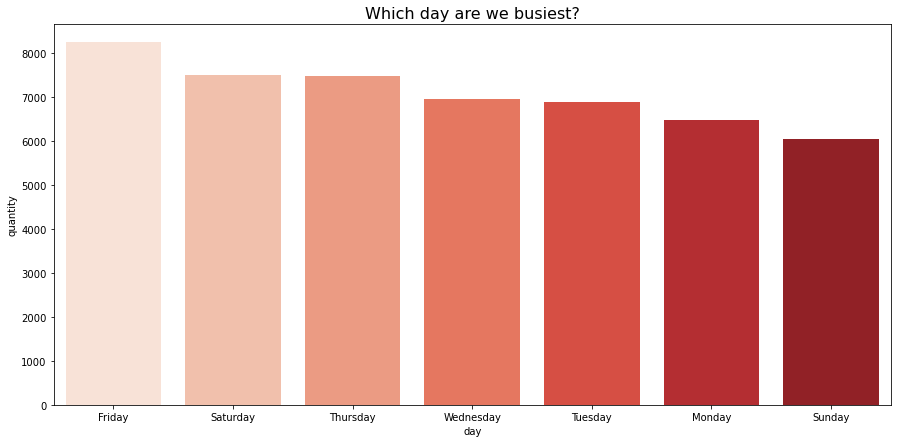

In [105]:
plt.figure(figsize=(15,7))
sns.barplot(data=day_df,x='day',y='quantity',palette='Reds')
plt.title('Which day are we busiest?',fontsize=16);

## Which day did we make more money?

In [107]:
pizza_df.columns

Index(['order_id', 'date', 'time', 'order_details_id', 'pizza_id', 'quantity',
       'pizza_type_id', 'size', 'price', 'name', 'category', 'ingredients',
       'day', 'month', 'hour', 'sales'],
      dtype='object')

In [110]:
sale_df= pd.DataFrame(pizza_df.groupby('day')['sales'].sum().sort_values(ascending=False)).reset_index()

sale_df['sale_pct'] = round(sale_df['sales'] / sale_df['sales'].sum()*100,2)

In [111]:
sale_df

,day,sales,sale_pct
0,Friday,136073.90,16.64
1,Thursday,123528.50,15.10
2,Saturday,123182.40,15.06
3,Wednesday,114408.40,13.99
4,Tuesday,114133.80,13.96
5,Monday,107329.55,13.12
6,Sunday,99203.50,12.13


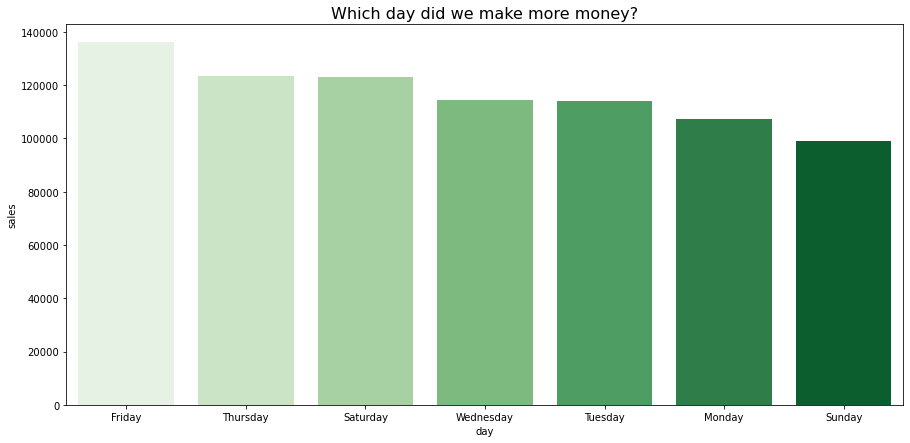

In [113]:
plt.figure(figsize=(15,7))
sns.barplot(data=sale_df,x='day',y='sales',palette='Greens')
plt.title('Which day did we make more money?',fontsize=16);

## How many different pizzas do we sell?

In [115]:
pizza_df.name.nunique()

32

In [116]:
pizza_df.name.unique()

array(['The Hawaiian Pizza', 'The Classic Deluxe Pizza',
       'The Five Cheese Pizza', 'The Italian Supreme Pizza',
       'The Mexicana Pizza', 'The Thai Chicken Pizza',
       'The Prosciutto and Arugula Pizza', 'The Barbecue Chicken Pizza',
       'The Greek Pizza', 'The Spinach Supreme Pizza',
       'The Green Garden Pizza', 'The Italian Capocollo Pizza',
       'The Spicy Italian Pizza', 'The Spinach Pesto Pizza',
       'The Vegetables + Vegetables Pizza', 'The Southwest Chicken Pizza',
       'The California Chicken Pizza', 'The Pepperoni Pizza',
       'The Chicken Pesto Pizza', 'The Big Meat Pizza',
       'The Soppressata Pizza', 'The Four Cheese Pizza',
       'The Napolitana Pizza', 'The Calabrese Pizza',
       'The Italian Vegetables Pizza', 'The Mediterranean Pizza',
       'The Pepper Salami Pizza', 'The Spinach and Feta Pizza',
       'The Sicilian Pizza', 'The Chicken Alfredo Pizza',
       'The Pepperoni, Mushroom, and Peppers Pizza',
       'The Brie Carre Pizza'

## The top 3 selling pizzas

In [129]:
pizza_rank = pd.DataFrame(pizza_df.groupby('name')['quantity'].sum().sort_values(ascending=False)).reset_index()
pizza_rank['percentage'] = round(pizza_rank['quantity']/pizza_rank['quantity'].sum()*100,1)

In [130]:
pizza_rank.head(3)

,name,quantity,percentage
0,The Classic Deluxe Pizza,2453,4.9
1,The Barbecue Chicken Pizza,2432,4.9
2,The Hawaiian Pizza,2422,4.9


## The worst 3 selling pizzas

In [132]:
pizza_rank.tail(3)

,name,quantity,percentage
29,The Calabrese Pizza,937,1.9
30,The Mediterranean Pizza,934,1.9
31,The Brie Carre Pizza,490,1.0


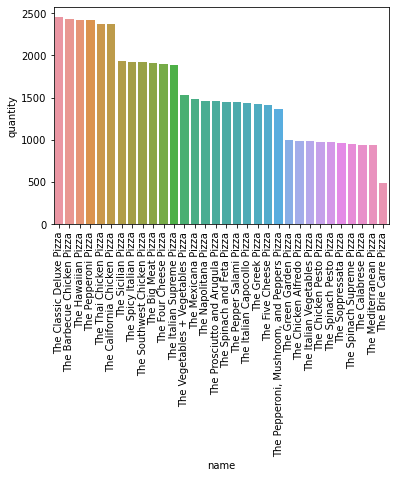

In [143]:
sns.barplot(data=pizza_rank,x='name',y='quantity')
plt.xticks(rotation=90);

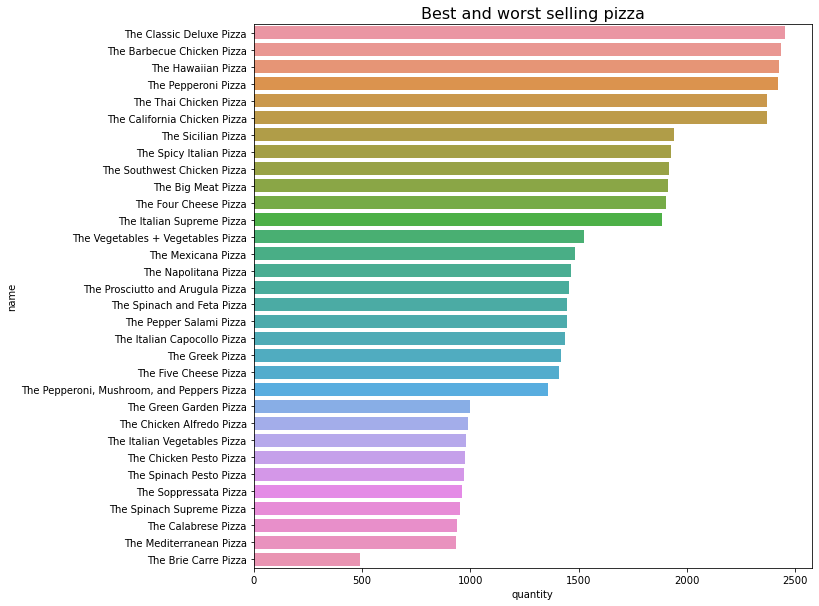

In [142]:
plt.figure(figsize=(10,10))
sns.barplot(data=pizza_rank,y='name',x='quantity',orient='h')
plt.title('Best and worst selling pizza',fontsize=16);

## Top Profitable Pizzas

In [145]:
profit = pd.DataFrame(pizza_df.groupby('name')['sales'].sum().sort_values(ascending=False)).reset_index()
profit['percentage'] = round(profit['sales']/profit['sales'].sum()*100,1)

In [146]:
profit.head()

,name,sales,percentage
0,The Thai Chicken Pizza,43434.25,5.3
1,The Barbecue Chicken Pizza,42768.00,5.2
2,The California Chicken Pizza,41409.50,5.1
3,The Classic Deluxe Pizza,38180.50,4.7
4,The Spicy Italian Pizza,34831.25,4.3


In [148]:
print('Based on quantities')
print(pizza_rank.head())
print('           ')
print('Based on Sales')
print(profit.head())

Based on quantities
                         name  quantity  percentage
0    The Classic Deluxe Pizza      2453         4.9
1  The Barbecue Chicken Pizza      2432         4.9
2          The Hawaiian Pizza      2422         4.9
3         The Pepperoni Pizza      2418         4.9
4      The Thai Chicken Pizza      2371         4.8
           
Based on Sales
                           name     sales  percentage
0        The Thai Chicken Pizza  43434.25         5.3
1    The Barbecue Chicken Pizza  42768.00         5.2
2  The California Chicken Pizza  41409.50         5.1
3      The Classic Deluxe Pizza  38180.50         4.7
4       The Spicy Italian Pizza  34831.25         4.3


In [149]:
profit.tail()

,name,sales,percentage
27,The Spinach Pesto Pizza,15596.00,1.9
28,The Mediterranean Pizza,15360.50,1.9
29,The Spinach Supreme Pizza,15277.75,1.9
30,The Green Garden Pizza,13955.75,1.7
31,The Brie Carre Pizza,11588.50,1.4


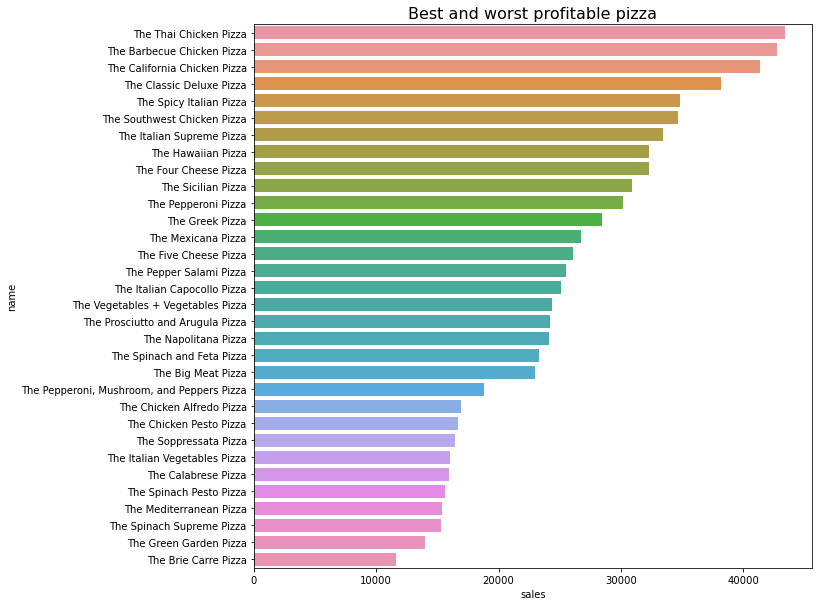

In [150]:
plt.figure(figsize=(10,10))
sns.barplot(data=profit,y='name',x='sales',orient='h')
plt.title('Best and worst profitable pizza',fontsize=16);

In [156]:
pizza_df.groupby('name')[['quantity','sales']].sum().reset_index().sort_values(by='sales',ascending=False)

,name,quantity,sales
30,The Thai Chicken Pizza,2371,43434.25
0,The Barbecue Chicken Pizza,2432,42768.00
4,The California Chicken Pizza,2370,41409.50
7,The Classic Deluxe Pizza,2453,38180.50
26,The Spicy Italian Pizza,1924,34831.25
25,The Southwest Chicken Pizza,1917,34705.75
14,The Italian Supreme Pizza,1884,33476.75
12,The Hawaiian Pizza,2422,32273.25
9,The Four Cheese Pizza,1902,32265.70
23,The Sicilian Pizza,1938,30940.50


In [160]:
size_df= pizza_df.groupby('size')[['quantity','sales']].sum().reset_index()
size_df['percent_sale'] = size_df['sales']/size_df['sales'].sum()*100
size_df['percent_qty'] = size_df['quantity']/size_df['quantity'].sum()*100
size_df

,size,quantity,sales,percent_sale,percent_qty
0,L,18956,375318.70,45.890333,38.237786
1,M,15635,249382.25,30.492044,31.538710
2,S,14403,178076.50,21.773468,29.053536
3,XL,552,14076.00,1.721077,1.113487
4,XXL,28,1006.60,0.123077,0.056481


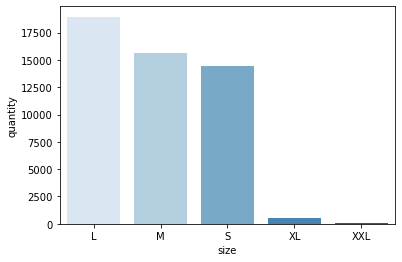

In [165]:
sns.barplot(data=size_df,x='size',y='quantity',palette='Blues');

In [171]:
heat=pizza_df.groupby(['day','hour'])['quantity'].sum().unstack('hour')

<AxesSubplot:xlabel='hour', ylabel='day'>

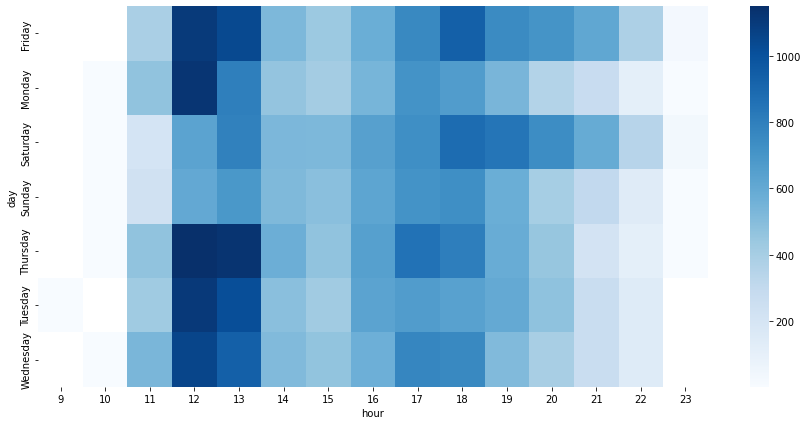

In [177]:
plt.figure(figsize=(15,7))
sns.heatmap(heat,cmap='Blues')